### Import librairies

In [2]:
import os, warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Configure options

In [3]:
# Ignore warnings
warnings.filterwarnings('ignore')

# Configure the display of DataFrames
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

# Configure the default viewing appearance
sns.set_theme()

### Load train and test datasets

In [4]:
#train = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
#test = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

#train = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
#test = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train = pd.read_csv("train.csv", sep=",")
test = pd.read_csv("test.csv", sep=",")
print("Format Train dataset : {} \nFormat Test dataset  : {}".format(train.shape, test.shape))

Format Train dataset : (1460, 81) 
Format Test dataset  : (1459, 80)


Both dataset were well loaded. We see that $train\ dataset$ contains **1460 rows** and **81 columns**. $test\ dataset$ contains **1459 rows** and **80 columns**.

In [4]:
# Print 5 random rows in train dataset
display(train.sample(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
457,458,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,CulDSac,Mod,ClearCr,Norm,Norm,1Fam,1Story,4,6,1954,1994,Flat,Tar&Grv,Plywood,Plywood,...,2,Gd,Attchd,1954.0,Fin,2,529,TA,TA,Y,224,137,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,256000
725,726,20,RL,60.0,6960,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1970,1970,Gable,CompShg,HdBoard,Plywood,...,0,NaN,Detchd,1989.0,Unf,2,660,TA,TA,Y,96,0,0,0,0,0,NaN,NaN,Shed,500,11,2009,WD,Normal,120500
1345,1346,30,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,4,1920,1950,Hip,CompShg,MetalSd,MetalSd,...,0,NaN,Detchd,1997.0,Unf,1,308,TA,TA,Y,0,0,168,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,108500
1211,1212,50,RL,152.0,12134,Pave,NaN,IR1,Bnk,AllPub,Inside,Mod,Gilbert,Norm,Norm,1Fam,1.5Fin,8,7,1988,2005,Gable,CompShg,Wd Sdng,Wd Sdng,...,0,NaN,Basment,1988.0,RFn,2,492,TA,TA,Y,325,12,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,164000
905,906,20,RL,80.0,9920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,HdBoard,HdBoard,...,0,NaN,Attchd,1954.0,RFn,1,280,TA,TA,Y,0,0,164,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,128000


In [5]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

**train dataset** contains numeric columns as well as categorical columns.

### Check missing and duplicated values

In [6]:
# Check missing values in train dataset
if train.isna().sum().sum() != 0:
    print("Dataset contains missng values.")
else :
    print("Dataset does'nt contain missng values.")

Dataset contains missng values.


In [7]:
# Display columns which contain mising values
missing_values = train.isna().mean().round(4) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
Electrical       0.07
dtype: float64

We can see that the columns $PoolQC$, $MiscFeature$, $Alley$, $Fence$, $MasVnrType$ and $FireplaceQu$ contain more than 45% of missing values. These columns will be delected in the rest of the work.

In [8]:
# Check duplicated values
duplicated_values = train.duplicated().sum()
if duplicated_values == 0:
    print("Dataset does'nt contain duplicated values.")
else :
    print("Dataset contains duplicated values.")

Dataset does'nt contain duplicated values.


### Delete missing values

In [9]:
# Select columns to drop
columns_to_drop = list(train.columns[train.isna().mean() * 100 > 45])
columns_to_drop

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [10]:
# Drop columns to drop
train_cleaned = train.drop(columns=columns_to_drop)

# Display the new shape of dataset
train_cleaned.shape

(1460, 75)

We can see that six columns have been dropped.

For the remaining columns with missing values, we will impute them as follows:

- ***Numeric columns***: Imputation by the median.
- ***Categorical columns***: Imputation by the most frequent value (the mode)

### Impute remaining columns with missing values

In [11]:
# Impute numeric columns ​​with median
imputer_num = SimpleImputer(strategy="median")

# Select numeric columns containing missing values
num_cols = [col for col in train_cleaned.select_dtypes(include=["float64", "int64"]).columns if train_cleaned[col].isna().sum() > 0]

# Check if num_cols contains columns
if num_cols:
    # Apply imputation on these columns and update the DataFrame
    train_cleaned[num_cols] = imputer_num.fit_transform(train_cleaned[num_cols])
else:
    print("No numeric columns with missing values were found.")

# Check that missing values have been imputed
print(train_cleaned[num_cols].isna().sum() if num_cols else "No columns imputed")

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64


In [12]:
# Impute categorical columns with most frequent value
imputer_cat = SimpleImputer(strategy="most_frequent")

# Select categorical columns containing missing values
cat_cols = [col for col in train_cleaned.select_dtypes(include=["object"]).columns if train_cleaned[col].isna().sum() > 0]

# Check and impute categorical columns
if cat_cols:
    train_cleaned[cat_cols] = imputer_cat.fit_transform(train_cleaned[cat_cols])
else:
    print("No categorical columns with missing values were found.")

# Vérifier que les valeurs manquantes ont été imputées
print(train_cleaned[cat_cols].isna().sum() if cat_cols else "No columns imputed")

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64


In [13]:
train_cleaned.isnull().sum().sum()

0

The dataset no longer contains missing values.

### Analysis of the target variable

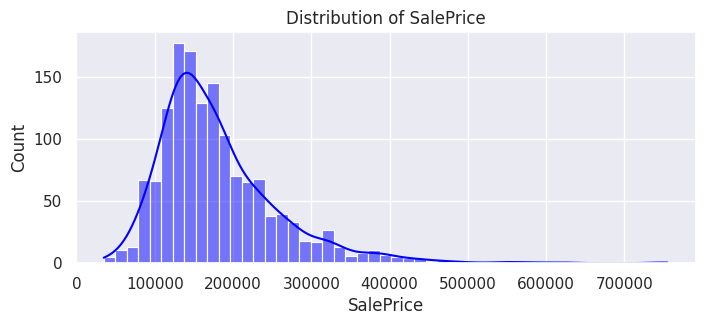

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [14]:
# Distribution of the target variable SalePrice
plt.figure(figsize=(8, 3))
sns.histplot(train_cleaned['SalePrice'], kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.show()

# Descriptive statistics of SalePrice
train_cleaned['SalePrice'].describe()

The distribution of house prices is skewed with a long tail on the right, indicating some very expensive houses. The median price is 163,000, while the mean, at 180,921, is pulled up by these high values. The standard deviation of 79,442 shows a large variability in house prices. The presence of some outliers, with a maximum price of 755,000, could distort the analysis. 

**A logarithmic transformation of the target variable could improve the performance of machine learning models.**

#### Analysis of the numeric features columns

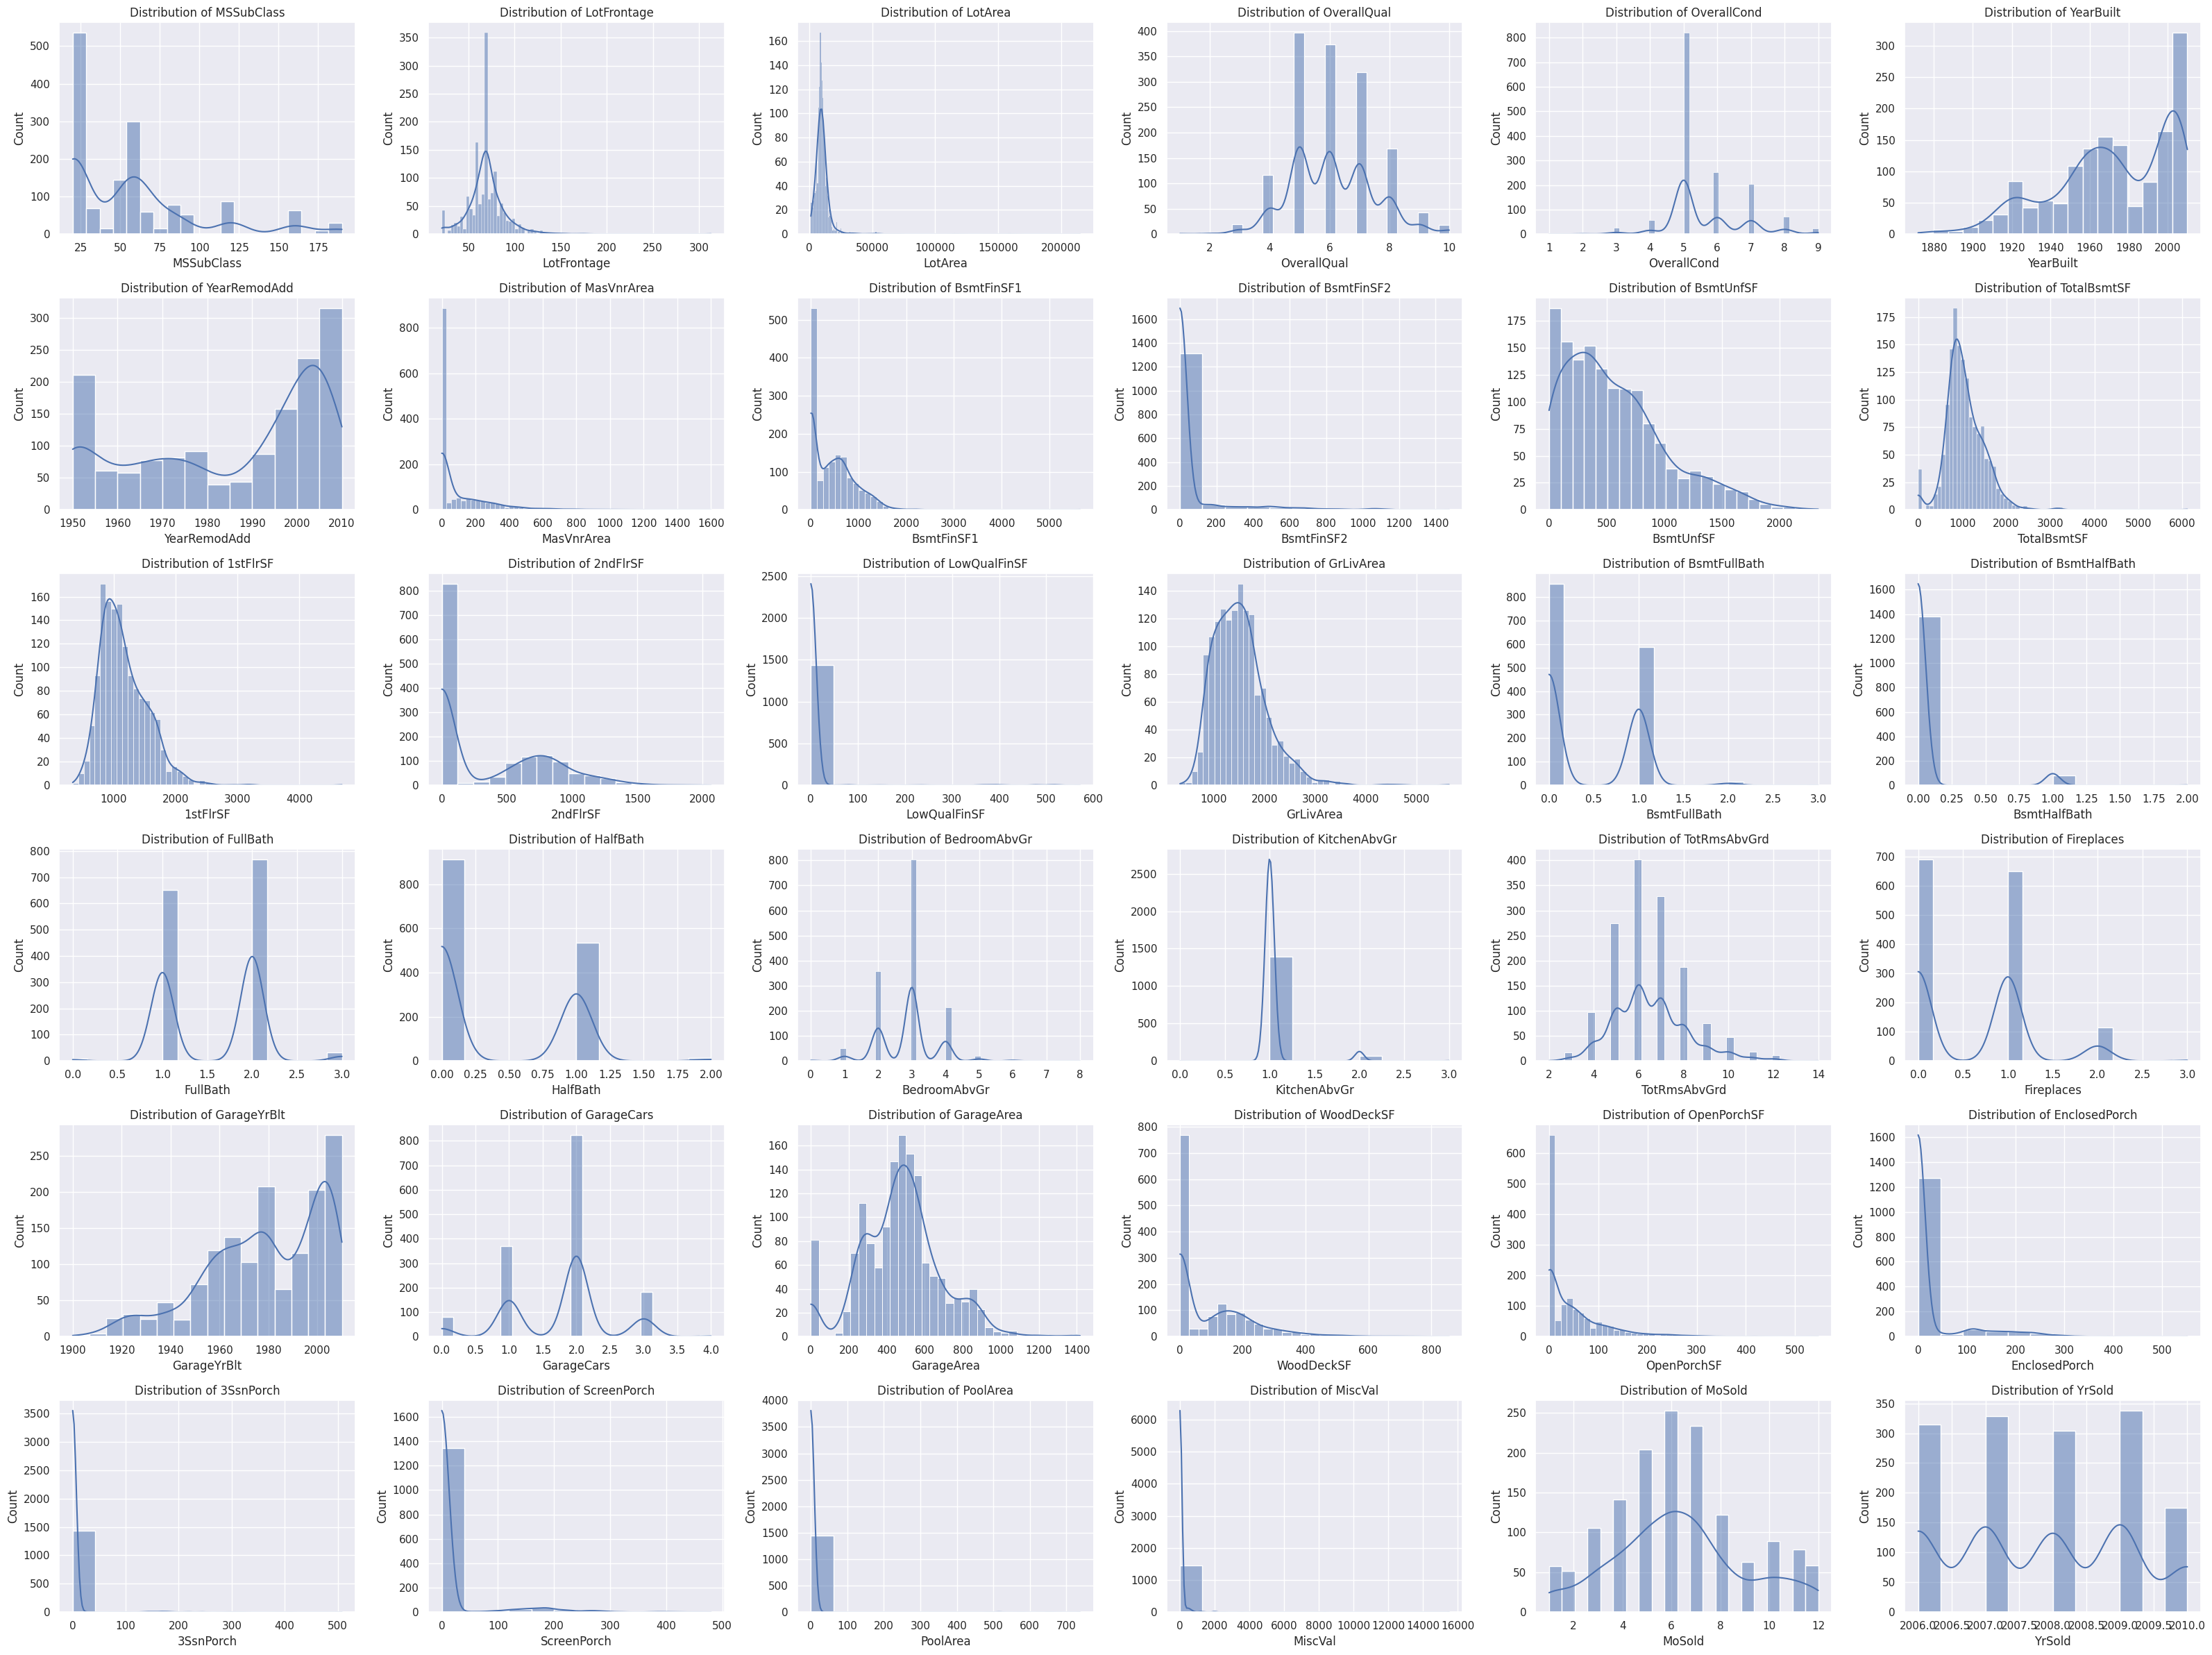

In [15]:
num_features = list(train_cleaned.drop(columns=["SalePrice", "Id"]).select_dtypes(include=[np.number]).columns)

# Set the number of columns per row
num_cols = 6
num_features_count = len(num_features)
num_rows = (num_features_count + num_cols - 1) // num_cols  # Calculate the number of lines needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(32, num_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()


for i, feature in enumerate(num_features):
    sns.histplot(train_cleaned[feature], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

# Delete unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Some variables show a symmetric distribution, while others are asymmetric. For example, variables like $GrLivArea$ and $TotalBsmtSF$ appear to have a skewed distribution with a long tail on the right.

- The scales of the variables vary considerably. Some variables, such as $1stFlrSF$ and $GarageArea$, have more concentrated values, while others, such as $LotArea$, have a wide range of values.

**It will therefore be interesting to apply a logarithmic transformation to the skewed variables to normalize the distributions. This is particularly useful for variables with a long right tail and to standardize the variables to ensure that they contribute equally to the analyses and models.**

### Create the columns

In [16]:
len(num_features)

36

In [17]:
# Logarithmic transformation for identified skewed variables
train_cleaned["Log_SalePrice"] = np.log1p(train_cleaned["SalePrice"])
train_cleaned["Log_GrLivArea"] = np.log1p(train_cleaned["GrLivArea"])
train_cleaned["Log_TotalBsmtSF"] = np.log1p(train_cleaned["TotalBsmtSF"])
train_cleaned["Log_1stFlrSF"] = np.log1p(train_cleaned["1stFlrSF"])
train_cleaned["Log_LotArea"] = np.log1p(train_cleaned["LotArea"])

# List of variables transformed
cols_transformed = ["SalePrice", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "LotArea"]

In [18]:
# Update the num_features
num_features = [col for col in num_features if col not in cols_transformed]
len(num_features)

32

**It will also be interesting to create the variables "HouseAge" which represents the age of the house and "SinceRemodel" which represents the time since the last renovation**

In [19]:
train_cleaned['HouseAge'] = train_cleaned['YrSold'] - train_cleaned['YearBuilt']
train_cleaned['SinceRemodel'] = train_cleaned['YrSold'] - train_cleaned['YearRemodAdd']

In [20]:
# Update the num_features
num_features = [col for col in num_features if col not in ["YrSold", "YearBuilt", "YearRemodAdd"]]
len(num_features)

29

### Correlation between target and features

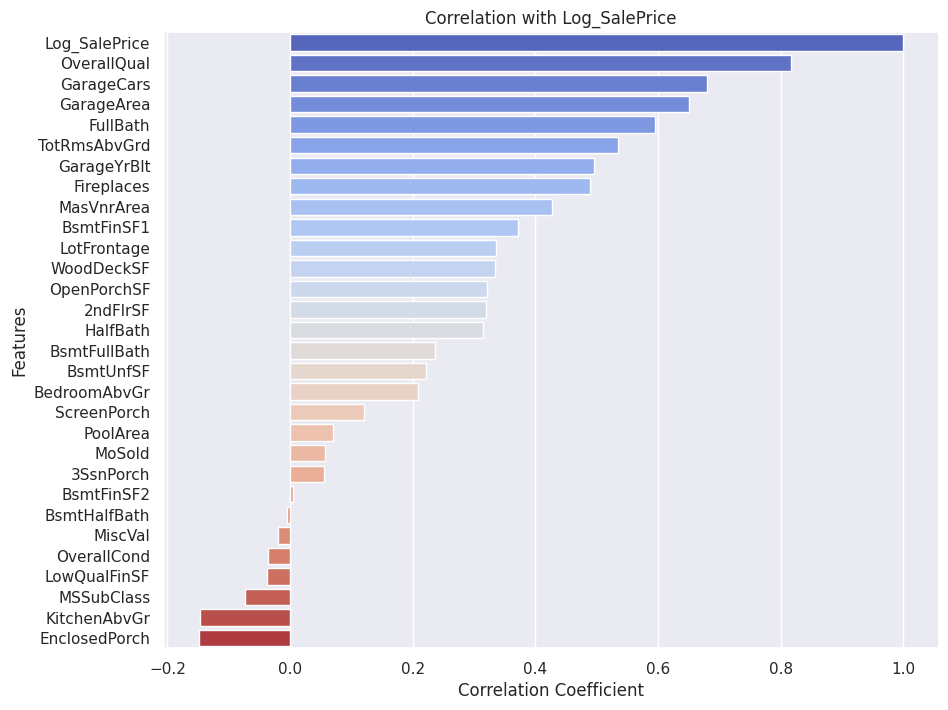

In [21]:
# Calculate the correlation matrix
num_cols = num_features + ["Log_SalePrice"]
correlation_matrix = train_cleaned[num_cols].corr()

# Extract correlations with target variable 'Log_SalePrice'
target_correlation = correlation_matrix['Log_SalePrice'].sort_values(ascending=False)

# Display correlations as barplot
plt.figure(figsize=(10, 8))
sns.barplot(x=target_correlation.values, y=target_correlation.index, palette='coolwarm')
plt.title('Correlation with Log_SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

We notice variables that are highly correlated with "SalePrice" as well as variables that are moderately correlated. We also note the presence of a few weakly correlated variables, this may imply that these have little or no linear relationship with "SalePrice".

**For further work, we will exclude weakly correlated variables.**

In [22]:
# Set correlation threshold
threshold = 0.25

# Select weakly correlated variables
weakly_correlated_features = target_correlation[abs(target_correlation) < threshold].index.tolist()

print(weakly_correlated_features)

['BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'OverallCond', 'LowQualFinSF', 'MSSubClass', 'KitchenAbvGr', 'EnclosedPorch']


In [23]:
# Update the num_cols liste
num_cols = [col for col in num_cols if col not in weakly_correlated_features]
len(num_cols)

15

### Correlation between features

In [24]:
num_features = [col for col in num_cols if col not in ["Log_SalePrice"]]
len(num_features)
print(num_features)

['LotFrontage', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


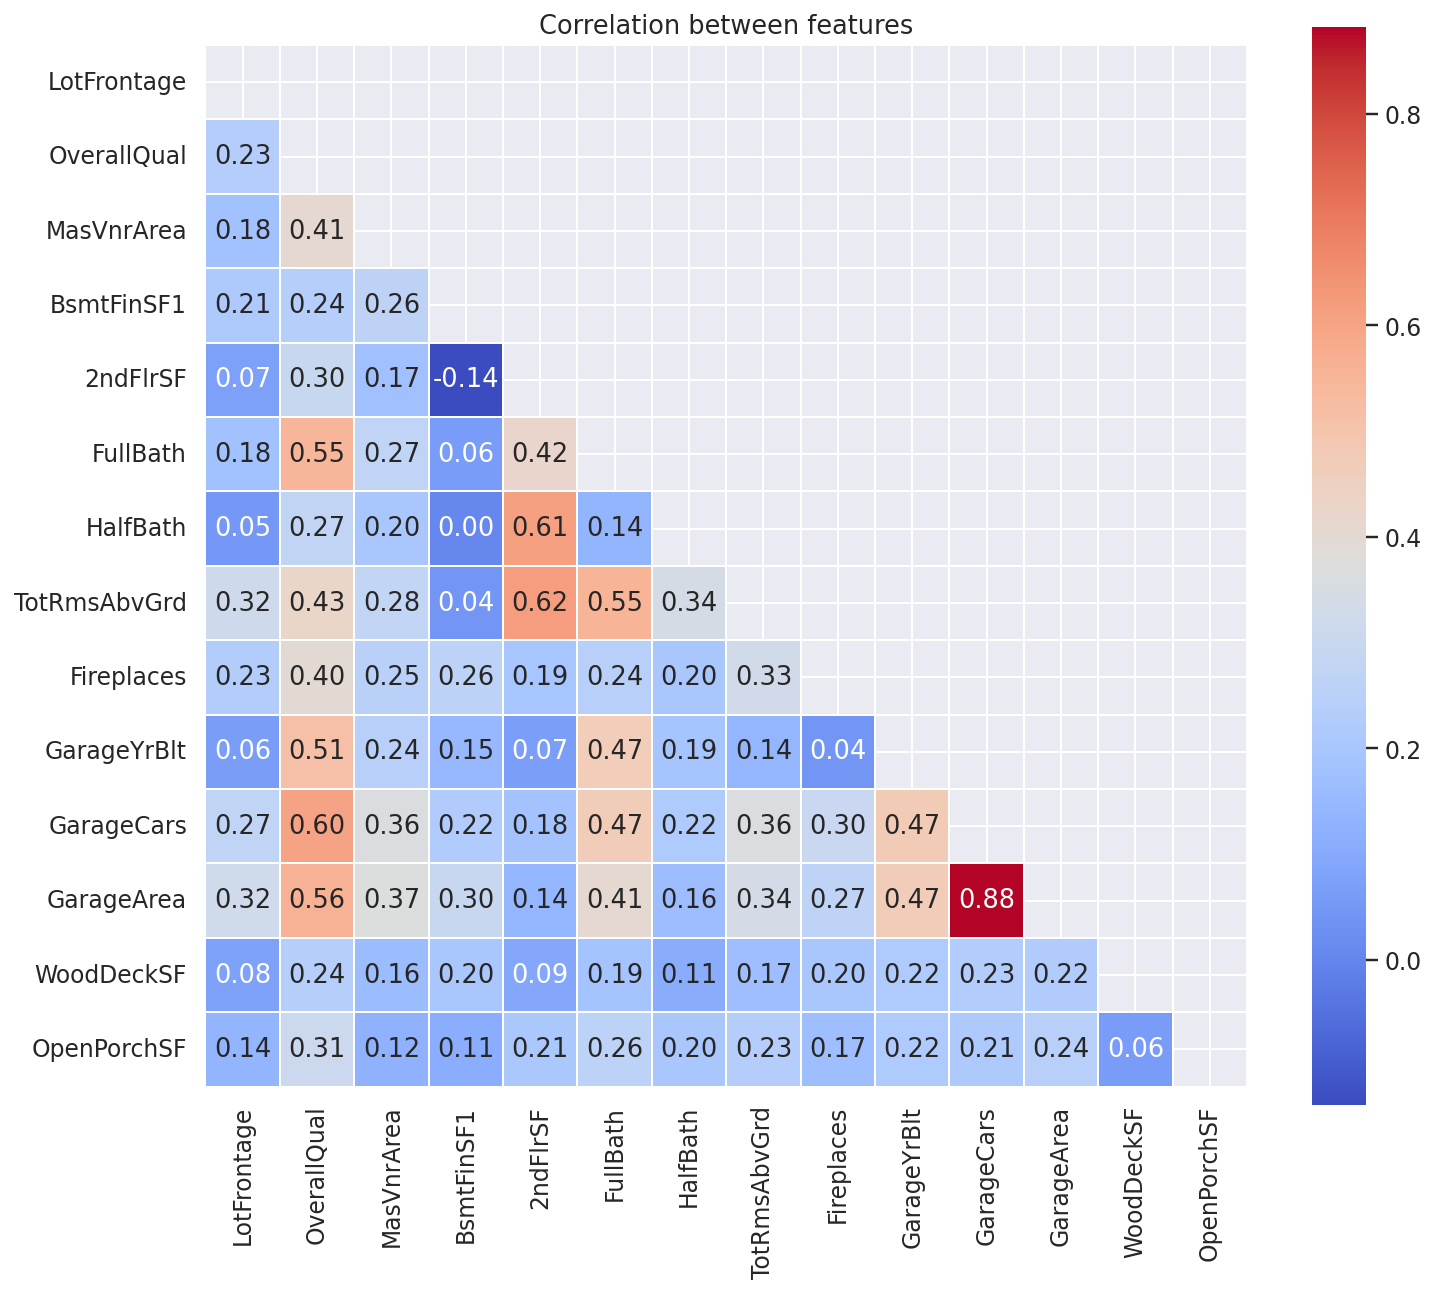

In [25]:
# Calcul de la matrice de corrélation
corr_matrix = train_cleaned[num_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Affichage de la heatmap
sns.set_theme(font_scale=1.1)
plt.figure(figsize=(12, 10), dpi=140)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap="coolwarm", square=True, mask=mask, linewidths=1, cbar=True)
plt.title('Correlation between features')
plt.show()

Especially the variables $"GarageCars"$ and $"GarageArea"$ have a very high correlation (0.88~0.9), which makes sense because more cars require more garage space. Since two variables are highly correlated, we consider using only one of these variables to avoid multicollinearity in your models.

In [26]:
num_features = [col for col in num_features if col not in ["GarageArea"]]
print(num_features)

['LotFrontage', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF']


In [27]:
len(num_features)

13

In [28]:
# Sélection des variables catégorielles
cat_features = list(train_cleaned.select_dtypes(include=['object']).columns)
print(f"Caractéristiques catégorielles : {cat_features}")

# Encodage des variables catégorielles avec LabelEncoder
label_encoders = {}
for col in cat_features:
    encoder = LabelEncoder()
    train_cleaned[col] = encoder.fit_transform(train_cleaned[col])
    label_encoders[col] = encoder  # Sauvegarder l'encodeur pour chaque colonne

# Vérification de l'encodage
display(train_cleaned[cat_features])

Caractéristiques catégorielles : ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,3,4,2,2,3,3,5,5,1,0,1,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,3,4,1,2,3,3,0,4,1,4,1,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,0,2,4,3,1,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,0,2,3,1,8,8,3,4,1,3,3,2,2,4,1,2,1,0,2,6,1,2,4,4,2,8,4


In [29]:
# Sélection des caractéristiques les plus importantes avec RandomForest
X_cat = train_cleaned[cat_features]
y = train_cleaned["Log_SalePrice"]

rf = RandomForestRegressor(random_state=42)
rf.fit(X_cat, y)

# Sélection des variables les plus importantes
selector = SelectFromModel(rf, threshold="mean", prefit=True)
X_selected = selector.transform(X_cat)

# Affichage des variables sélectionnées
cat_features = list(X_cat.columns[selector.get_support()])

In [30]:
len(cat_features)

8

In [31]:
print(num_features)
print(cat_features)

['LotFrontage', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF']
['MSZoning', 'Neighborhood', 'HouseStyle', 'ExterQual', 'BsmtQual', 'CentralAir', 'KitchenQual', 'GarageFinish']


In [32]:
features_cols = num_features + cat_features
print(features_cols)
len(features_cols)

['LotFrontage', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'MSZoning', 'Neighborhood', 'HouseStyle', 'ExterQual', 'BsmtQual', 'CentralAir', 'KitchenQual', 'GarageFinish']


21

In [33]:
X = train_cleaned[features_cols]
y = train_cleaned["Log_SalePrice"]

# Division en ensembles d'entraînement et de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Optimisation et entraînement du modèle : Linear Regression
Linear Regression -> RMSE: 0.1775, R²: 0.8312

Optimisation et entraînement du modèle : Ridge Regression
Meilleurs hyperparamètres pour Ridge Regression : {'alpha': 0.1}
Ridge Regression -> RMSE: 0.1775, R²: 0.8312

Optimisation et entraînement du modèle : Lasso Regression
Meilleurs hyperparamètres pour Lasso Regression : {'alpha': 0.001}
Lasso Regression -> RMSE: 0.1771, R²: 0.8319

Optimisation et entraînement du modèle : Random Forest
Meilleurs hyperparamètres pour Random Forest : {'max_depth': 20, 'n_estimators': 200}
Random Forest -> RMSE: 0.1637, R²: 0.8564

Optimisation et entraînement du modèle : Gradient Boosting
Meilleurs hyperparamètres pour Gradient Boosting : {'learning_rate': 0.1, 'n_estimators': 100}
Gradient Boosting -> RMSE: 0.1608, R²: 0.8614

Optimisation et entraînement du modèle : XGBRegressor
Meilleurs hyperparamètres pour XGBRegressor : {'learning_rate': 0.1, 'n_estimators': 100}
XGBRegressor -> RMSE: 0.1

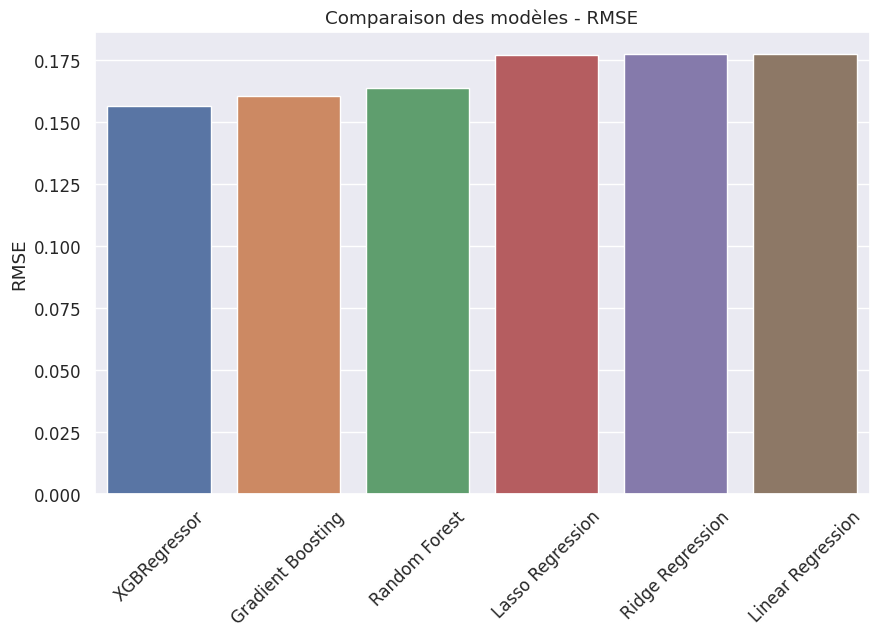

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
# Liste des modèles à tester
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor()
}

# Hyperparamètres à optimiser pour chaque modèle
param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1, 10, 100]},
    'Lasso Regression': {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    'XGBRegressor': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
}

# Fonction pour entraîner et comparer les modèles
def evaluate_models(X_train, y_train, X_test, y_test, models, param_grids):
    results = {}
    
    for model_name, model in models.items():
        print(f"Optimisation et entraînement du modèle : {model_name}")
        
        # Si le modèle a des hyperparamètres à optimiser
        if param_grids[model_name]:
            grid_search = GridSearchCV(model, param_grids[model_name], cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            print(f"Meilleurs hyperparamètres pour {model_name} : {grid_search.best_params_}")
        else:
            best_model = model
            best_model.fit(X_train, y_train)
        
        # Prédictions
        y_pred = best_model.predict(X_test)
        
        # Calcul des métriques
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        results[model_name] = {'RMSE': rmse, 'R²': r2}
        print(f"{model_name} -> RMSE: {rmse:.4f}, R²: {r2:.4f}\n")
    
    return results

# Appeler la fonction pour comparer les modèles
results = evaluate_models(X_train, y_train, X_test, y_test, models, param_grids)

# Afficher les résultats
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")
print("Résultats de la comparaison des modèles :")
print(results_df)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['RMSE'])
plt.xticks(rotation=45)
plt.title("Comparaison des modèles - RMSE")
plt.show()

In [35]:
# Trouver le meilleur modèle basé sur le RMSE
best_model_name = results_df['RMSE'].idxmin()
best_model_rmse = results_df['RMSE'].min()
best_model_r2 = results_df.loc[best_model_name, 'R²']

print(f"Le meilleur modèle est : {best_model_name}")
print(f"RMSE : {best_model_rmse:.4f}, R² : {best_model_r2:.4f}")

# Entraîner le modèle final avec les meilleurs hyperparamètres si applicable
final_model = models[best_model_name]
if param_grids[best_model_name]:
    grid_search = GridSearchCV(final_model, param_grids[best_model_name], cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    final_model = grid_search.best_estimator_
else:
    final_model.fit(X_train, y_train)

print("Le modèle final a été entraîné avec succès.")

Le meilleur modèle est : XGBRegressor
RMSE : 0.1566, R² : 0.8686
Le modèle final a été entraîné avec succès.


In [36]:
test_cleaned = test[features_cols]
test_cleaned.shape

(1459, 21)

In [37]:
print(num_features)

['LotFrontage', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF']


In [38]:
print(list(test_cleaned.select_dtypes(include=["float64", "int64"]).columns))

['LotFrontage', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF']


In [39]:
print(list(X.select_dtypes(include=["float64", "int64"]).columns))

['LotFrontage', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'MSZoning', 'Neighborhood', 'HouseStyle', 'ExterQual', 'BsmtQual', 'CentralAir', 'KitchenQual', 'GarageFinish']


In [40]:
# Appliquer l'imputation uniquement sur les colonnes communes
imputer_num = SimpleImputer(strategy='median')
test_cleaned[num_features] = imputer_num.fit_transform(test_cleaned[num_features])

In [41]:
test_cleaned[num_features].isna().sum().sum()

0

In [42]:
test_cleaned[cat_features].isna().sum().sum()

127

In [43]:
# Encodage des variables catégorielles avec LabelEncoder
label_encoders = {}
for col in cat_features:
    encoder = LabelEncoder()
    test_cleaned[col] = encoder.fit_transform(test_cleaned[col])
    label_encoders[col] = encoder  # Sauvegarder l'encodeur pour chaque colonne

In [44]:
test_cleaned[cat_features].isna().sum().sum()

0

In [45]:
test_cleaned.shape

(1459, 21)

In [46]:
test_final_scaled = scaler.transform(test_cleaned)

In [47]:
# Predictions on the test set
test_predictions = final_model.predict(test_final_scaled)
final_predictions = np.expm1(test_predictions)

# Prepare for submission
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': final_predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("Soumission prête.")

Soumission prête.
